In [1]:
# パッケージのインストール

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # trainとtest分割用
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
#google colab 環境の時のデータインストール　（local環境のデータインストールをする場合、ここを実行する必要ない。）
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/My Drive/dataset"

Mounted at /content/drive
/content/drive/My Drive/dataset


In [3]:
#google colab 環境の時のデータインストール２　（local環境のデータインストールをする場合、ここを実行する必要ない。）
iris = pd.read_csv("bezdekIris.data",sep=",", names=('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'))
wine = pd.read_csv("wine.data",sep=",",header=None)
abalone = pd.read_csv("balance-scale.data",sep=",",header=None)
wifi = pd.read_csv("wifi_localization.txt",header=None,sep= "\t")
#print(iris)
#print(wine)

In [ ]:
#local 環境のデータインストール(google colab環境で実行する場合ここは必要ない。）
iris = pd.read_csv("../dataset/bezdekIris.data",sep=",", names=('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'))
wine = pd.read_csv("../dataset/wine.data",sep=",",header=None)
abalone = pd.read_csv("../dataset/balance-scale.data",sep=",",header=None)
wifi = pd.read_csv("../dataset/wifi_localization.txt",header=None,sep= "\t")

#print(iris)
#print(wine)

In [8]:
#データの整理
iris_label = iris.loc[:, "label":] 
iris_data  = iris.loc[:, :"petal_width"] 

wine_label  = wine.iloc[:, :1] 
wine_data = wine.iloc[:, 1:] 

balance_label  = abalone.iloc[:, :1] 
balance_data = abalone.iloc[:, 1:]

wifi_data  = wifi.iloc[:, :-1] 
wifi_label = wifi.iloc[:, -1:]

In [9]:
print(balance_label)

     0
0    B
1    R
2    R
3    R
4    R
..  ..
620  L
621  L
622  L
623  L
624  B

[625 rows x 1 columns]


In [24]:
#混合行列可視化用　関数

def make_cm(matrix, columns):
    # matrix numpy配列

    # columns 項目名リスト
    n = len(columns)

    # '正解データ'をn回繰り返すリスト生成
    print("confusion matrix:")
    print("横:予測データ  縦:正解データ ")
    #データフレーム生成
    cm = pd.DataFrame(matrix, 
        columns=[columns], index=[columns])
    return cm


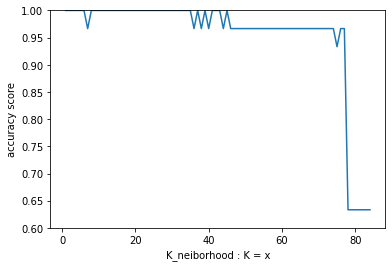

iris:
accuracy:1.0   (K=1)

confusion matrix:
横:予測データ  縦:正解データ 
                Iris-setosa Iris-versicolor Iris-virginica
Iris-setosa              10               0              0
Iris-versicolor           0               9              0
Iris-virginica            0               0             11


In [38]:
#iris dataset KNN
#テストデータ　トレーニングデータ分割
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label, test_size=0.2, random_state=42)
y_train =np.reshape(y_train["label"],(-1))
label = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

#グラフデータ変数定義
graph_x = range(1,85)
graph_y = []
max_accuracy = -1
max_K = -1
cm = -1

#knn k=1 から k = 85までテスト
for K in range(1,85):
  #変数kのknn分類機
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    graph_y.append(metrics.accuracy_score(y_test, Y_pred))

    if max_accuracy < metrics.accuracy_score(y_test, Y_pred):
        max_accuracy = metrics.accuracy_score(y_test, Y_pred)
        max_K = K
        cm = confusion_matrix(y_test, Y_pred,labels=label)

plt.plot(graph_x, graph_y)

plt.xlabel('K_neiborhood : K = x')
plt.ylabel('accuracy score')
plt.ylim(0.6, 1)
plt.show()

print("iris:")
print("accuracy:" + str(max_accuracy) +"   (K=" + str(max_K) + ")\n")    # 予測精度計測
print(make_cm(cm,label))

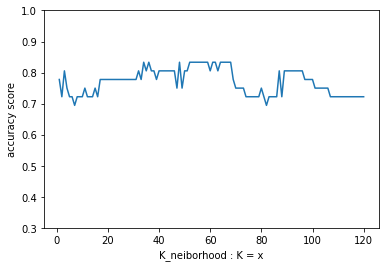

wine:
accuracy:0.8333333333333334   (K=34)

confusion matrix:
横:予測データ  縦:正解データ 
    1   2  3
1  14   0  0
2   0  10  4
3   0   2  6


In [39]:
#wine 
#テストデータ分割
X_train, X_test, y_train, y_test = train_test_split(wine_data,wine_label, test_size=0.2, random_state=42)
y_train =np.reshape(y_train[0],(-1))
label = [1,2,3]
#グラフ向け変数定義
graph_x = range(1,121)
graph_y = []
max_accuracy = -1
max_K = -1
cm = -1

#knn k=1 から k=121までテスト
for K in range(1,121):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    graph_y.append(metrics.accuracy_score(y_test, Y_pred))

    if max_accuracy < metrics.accuracy_score(y_test, Y_pred):
        max_accuracy = metrics.accuracy_score(y_test, Y_pred)
        max_K = K
        cm = confusion_matrix(y_test, Y_pred, labels = label)
plt.plot(graph_x, graph_y)

plt.xlabel('K_neiborhood : K = x')
plt.ylabel('accuracy score')
plt.ylim(0.3, 1)
plt.show()
print("wine:")
print("accuracy:" + str(max_accuracy) +"   (K=" + str(max_K) + ")\n")    # 予測精度計測
print(make_cm(cm,label))

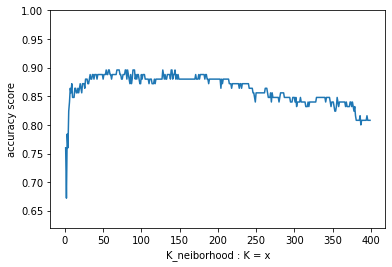

balance:
accuracy:0.896   (K=54)

confusion matrix:
横:予測データ  縦:正解データ 
    R  B   L
R  57  0   2
B   5  0   6
L   0  0  55


In [42]:
#balance
#X_train, X_test, y_train, y_test = train_test_split(abalone_data.iloc[:, :-3],abalone_label, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(balance_data.iloc[:, :],balance_label, test_size=0.2, random_state=42)
y_train =np.reshape(y_train[0],(-1))

#print(set(y_test[0]))
#グラフ用変数定義
graph_x = range(1,400)
graph_y = []
max_accuracy = -1
max_K = -1
cm = -1
labels = ["R", "B", "L"]
#k＝１から4００までテスト
for K in range(1,400):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    graph_y.append(metrics.accuracy_score(y_test, Y_pred))

    if max_accuracy < metrics.accuracy_score(y_test, Y_pred):
        max_accuracy = metrics.accuracy_score(y_test, Y_pred)
        max_K = K
        cm = confusion_matrix(y_test, Y_pred, labels = labels)
plt.plot(graph_x, graph_y)

plt.xlabel('K_neiborhood : K = x')
plt.ylabel('accuracy score')
plt.ylim(0.62, 1)
plt.show()
print("balance:")
print("accuracy:" + str(max_accuracy) +"   (K=" + str(max_K) + ")\n")    # 予測精度計測

print(make_cm(cm,labels))

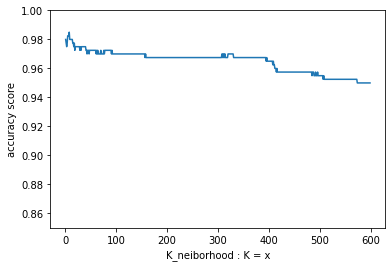

wifi:
accuracy:0.985   (K=8)

confusion matrix:
横:予測データ  縦:正解データ 
     1   2   3    4
1  104   0   0    0
2    0  90   5    0
3    0   0  88    0
4    1   0   0  112


In [43]:
#wifi
#X_train, X_test, y_train, y_test = train_test_split(abalone_data.iloc[:, :-3],abalone_label, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(wifi_data.iloc[:, :],wifi_label, test_size=0.2, random_state=42)
y_train =np.reshape(y_train[7],(-1))
labels = list( set(y_train) )
#グラフ用変数定義
graph_x = range(1,600)
graph_y = []
max_accuracy = -1
max_K = -1
cm = -1

#k＝１から6００までテスト
for K in range(1,600):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    graph_y.append(metrics.accuracy_score(y_test, Y_pred))

    if max_accuracy < metrics.accuracy_score(y_test, Y_pred):
        max_accuracy = metrics.accuracy_score(y_test, Y_pred)
        max_K = K
        cm = confusion_matrix(y_test, Y_pred, labels = labels)
plt.plot(graph_x, graph_y)

plt.xlabel('K_neiborhood : K = x')
plt.ylabel('accuracy score')
plt.ylim(0.85, 1.0)
plt.show()

print("wifi:")
print("accuracy:" + str(max_accuracy) +"   (K=" + str(max_K) + ")\n")    # 予測精度計測
print(make_cm(cm, labels))